# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4"

DATE= f'2022-04-05_22-21-39'

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/{DATE}/figuras"):
    os.makedirs(f"{PATH}/{DATE}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/{DATE}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,05/04/2022_22:21:42,744,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,62.00,53.13,59.88,55.06,57.94,Apagado
1,05/04/2022_22:21:48,741,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,62.00,53.06,59.81,54.94,57.88,Prendido
2,05/04/2022_22:21:54,731,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,62.00,53.06,59.88,54.94,57.88,Prendido
3,05/04/2022_22:22:00,727,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,62.00,53.06,59.88,54.94,57.88,Prendido
4,05/04/2022_22:22:06,726,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,61.94,53.06,59.88,54.94,57.88,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,05/04/2022_22:31:00,720,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,61.69,52.50,58.88,54.69,57.06,Prendido
96,05/04/2022_22:31:05,717,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,61.75,52.50,58.88,54.69,57.06,Prendido
97,05/04/2022_22:31:11,717,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,61.75,52.50,58.88,54.75,57.00,Prendido
98,05/04/2022_22:31:17,717,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,61.75,52.56,58.81,54.75,57.00,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

05/04/2022_22:21:42


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(f'{PATH}/{DATE}'):
    if file.endswith(".csv"):
        n += 1

print(n)

81


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/{DATE}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

05/04/2022_22:21:42
05/04/2022_22:21:48
05/04/2022_22:21:54
05/04/2022_22:22:00
05/04/2022_22:22:06
05/04/2022_22:22:11
05/04/2022_22:22:17
05/04/2022_22:22:23
05/04/2022_22:22:29
05/04/2022_22:22:35
05/04/2022_22:22:41
05/04/2022_22:22:47
05/04/2022_22:22:53
05/04/2022_22:22:58
05/04/2022_22:23:04
05/04/2022_22:23:10
05/04/2022_22:23:16
05/04/2022_22:23:22
05/04/2022_22:23:28
05/04/2022_22:23:34
05/04/2022_22:23:39
05/04/2022_22:23:45
05/04/2022_22:23:51
05/04/2022_22:23:57
05/04/2022_22:24:03
05/04/2022_22:24:09
05/04/2022_22:24:15
05/04/2022_22:24:21
05/04/2022_22:24:26
05/04/2022_22:24:32
05/04/2022_22:24:38
05/04/2022_22:24:44
05/04/2022_22:24:50
05/04/2022_22:24:56
05/04/2022_22:25:02
05/04/2022_22:25:07
05/04/2022_22:25:13
05/04/2022_22:25:19
05/04/2022_22:25:25
05/04/2022_22:25:31
05/04/2022_22:25:37
05/04/2022_22:25:43
05/04/2022_22:25:49
05/04/2022_22:25:54
05/04/2022_22:26:00
05/04/2022_22:26:06
05/04/2022_22:26:12
05/04/2022_22:26:18
05/04/2022_22:26:24
05/04/2022_22:26:30


05/04/2022_23:08:44
05/04/2022_23:08:50
05/04/2022_23:08:56
05/04/2022_23:09:02
05/04/2022_23:09:08
05/04/2022_23:09:14
05/04/2022_23:09:20
05/04/2022_23:09:25
05/04/2022_23:09:31
05/04/2022_23:09:37
05/04/2022_23:09:43
05/04/2022_23:09:49
05/04/2022_23:09:55
05/04/2022_23:10:01
05/04/2022_23:10:06
05/04/2022_23:10:12
05/04/2022_23:10:18
05/04/2022_23:10:24
05/04/2022_23:10:30
05/04/2022_23:10:36
05/04/2022_23:10:42
05/04/2022_23:10:48
05/04/2022_23:10:53
05/04/2022_23:10:59
05/04/2022_23:11:05
05/04/2022_23:11:11
05/04/2022_23:11:17
05/04/2022_23:11:23
05/04/2022_23:11:29
05/04/2022_23:11:34
05/04/2022_23:11:40
05/04/2022_23:11:46
05/04/2022_23:11:52
05/04/2022_23:11:58
05/04/2022_23:12:04
05/04/2022_23:12:10
05/04/2022_23:12:16
05/04/2022_23:12:21
05/04/2022_23:12:27
05/04/2022_23:12:33
05/04/2022_23:12:39
05/04/2022_23:12:45
05/04/2022_23:12:51
05/04/2022_23:12:57
05/04/2022_23:13:03
05/04/2022_23:13:08
05/04/2022_23:13:14
05/04/2022_23:13:20
05/04/2022_23:13:26
05/04/2022_23:13:32


05/04/2022_23:53:20
05/04/2022_23:53:26
05/04/2022_23:53:32
05/04/2022_23:53:37
05/04/2022_23:53:43
05/04/2022_23:53:49
05/04/2022_23:53:55
05/04/2022_23:54:01
05/04/2022_23:54:07
05/04/2022_23:54:13
05/04/2022_23:54:18
05/04/2022_23:54:24
05/04/2022_23:54:30
05/04/2022_23:54:36
05/04/2022_23:54:42
05/04/2022_23:54:48
05/04/2022_23:54:54
05/04/2022_23:55:00
05/04/2022_23:55:05
05/04/2022_23:55:11
05/04/2022_23:55:17
05/04/2022_23:55:23
05/04/2022_23:55:29
05/04/2022_23:55:35
05/04/2022_23:55:41
05/04/2022_23:55:46
05/04/2022_23:55:52
05/04/2022_23:55:58
05/04/2022_23:56:04
05/04/2022_23:56:10
05/04/2022_23:56:16
05/04/2022_23:56:22
05/04/2022_23:56:28
05/04/2022_23:56:33
05/04/2022_23:56:39
05/04/2022_23:56:45
05/04/2022_23:56:51
05/04/2022_23:56:57
05/04/2022_23:57:03
05/04/2022_23:57:09
05/04/2022_23:57:14
05/04/2022_23:57:20
05/04/2022_23:57:26
05/04/2022_23:57:32
05/04/2022_23:57:38
05/04/2022_23:57:44
05/04/2022_23:57:50
05/04/2022_23:57:56
05/04/2022_23:58:01
05/04/2022_23:58:07


06/04/2022_00:47:36
06/04/2022_00:47:42
06/04/2022_00:47:48
06/04/2022_00:47:54
06/04/2022_00:47:59
06/04/2022_00:48:05
06/04/2022_00:48:11
06/04/2022_00:48:17
06/04/2022_00:48:23
06/04/2022_00:48:29
06/04/2022_00:48:35
06/04/2022_00:48:40
06/04/2022_00:48:46
06/04/2022_00:48:52
06/04/2022_00:48:58
06/04/2022_00:49:04
06/04/2022_00:49:10
06/04/2022_00:49:16
06/04/2022_00:49:22
06/04/2022_00:49:27
06/04/2022_00:49:33
06/04/2022_00:49:39
06/04/2022_00:49:45
06/04/2022_00:49:51
06/04/2022_00:49:57
06/04/2022_00:50:03
06/04/2022_00:50:08
06/04/2022_00:50:14
06/04/2022_00:50:20
06/04/2022_00:50:26
06/04/2022_00:50:32
06/04/2022_00:50:38
06/04/2022_00:50:44
06/04/2022_00:50:50
06/04/2022_00:50:55
06/04/2022_00:51:01
06/04/2022_00:51:07
06/04/2022_00:51:13
06/04/2022_00:51:19
06/04/2022_00:51:25
06/04/2022_00:51:31
06/04/2022_00:51:36
06/04/2022_00:51:42
06/04/2022_00:51:48
06/04/2022_00:51:54
06/04/2022_00:52:00
06/04/2022_00:52:06
06/04/2022_00:52:12
06/04/2022_00:52:18
06/04/2022_00:52:23


06/04/2022_01:37:16
06/04/2022_01:37:22
06/04/2022_01:37:28
06/04/2022_01:37:34
06/04/2022_01:37:40
06/04/2022_01:37:46
06/04/2022_01:37:52
06/04/2022_01:37:57
06/04/2022_01:38:03
06/04/2022_01:38:09
06/04/2022_01:38:15
06/04/2022_01:38:21
06/04/2022_01:38:27
06/04/2022_01:38:33
06/04/2022_01:38:39
06/04/2022_01:38:44
06/04/2022_01:38:50
06/04/2022_01:38:56
06/04/2022_01:39:02
06/04/2022_01:39:08
06/04/2022_01:39:14
06/04/2022_01:39:20
06/04/2022_01:39:25
06/04/2022_01:39:31
06/04/2022_01:39:37
06/04/2022_01:39:43
06/04/2022_01:39:49
06/04/2022_01:39:55
06/04/2022_01:40:01
06/04/2022_01:40:07
06/04/2022_01:40:12
06/04/2022_01:40:18
06/04/2022_01:40:24
06/04/2022_01:40:30
06/04/2022_01:40:36
06/04/2022_01:40:42
06/04/2022_01:40:48
06/04/2022_01:40:53
06/04/2022_01:40:59
06/04/2022_01:41:05
06/04/2022_01:41:11
06/04/2022_01:41:17
06/04/2022_01:41:23
06/04/2022_01:41:29
06/04/2022_01:41:35
06/04/2022_01:41:40
06/04/2022_01:41:46
06/04/2022_01:41:52
06/04/2022_01:41:58
06/04/2022_01:42:04


06/04/2022_02:19:37
06/04/2022_02:19:42
06/04/2022_02:19:48
06/04/2022_02:19:54
06/04/2022_02:20:00
06/04/2022_02:20:06
06/04/2022_02:20:12
06/04/2022_02:20:18
06/04/2022_02:20:24
06/04/2022_02:20:29
06/04/2022_02:20:35
06/04/2022_02:20:41
06/04/2022_02:20:47
06/04/2022_02:20:53
06/04/2022_02:20:59
06/04/2022_02:21:05
06/04/2022_02:21:10
06/04/2022_02:21:16
06/04/2022_02:21:22
06/04/2022_02:21:28
06/04/2022_02:21:34
06/04/2022_02:21:40
06/04/2022_02:21:46
06/04/2022_02:21:52
06/04/2022_02:21:57
06/04/2022_02:22:03
06/04/2022_02:22:09
06/04/2022_02:22:15
06/04/2022_02:22:21
06/04/2022_02:22:27
06/04/2022_02:22:33
06/04/2022_02:22:38
06/04/2022_02:22:44
06/04/2022_02:22:50
06/04/2022_02:22:56
06/04/2022_02:23:02
06/04/2022_02:23:08
06/04/2022_02:23:14
06/04/2022_02:23:20
06/04/2022_02:23:25
06/04/2022_02:23:31
06/04/2022_02:23:37
06/04/2022_02:23:43
06/04/2022_02:23:49
06/04/2022_02:23:55
06/04/2022_02:24:01
06/04/2022_02:24:06
06/04/2022_02:24:12
06/04/2022_02:24:18
06/04/2022_02:24:24


06/04/2022_03:09:46
06/04/2022_03:09:52
06/04/2022_03:09:58
06/04/2022_03:10:04
06/04/2022_03:10:10
06/04/2022_03:10:15
06/04/2022_03:10:21
06/04/2022_03:10:27
06/04/2022_03:10:33
06/04/2022_03:10:39
06/04/2022_03:10:45
06/04/2022_03:10:51
06/04/2022_03:10:56
06/04/2022_03:11:02
06/04/2022_03:11:08
06/04/2022_03:11:14
06/04/2022_03:11:20
06/04/2022_03:11:26
06/04/2022_03:11:32
06/04/2022_03:11:38
06/04/2022_03:11:43
06/04/2022_03:11:49
06/04/2022_03:11:55
06/04/2022_03:12:01
06/04/2022_03:12:07
06/04/2022_03:12:13
06/04/2022_03:12:19
06/04/2022_03:12:24
06/04/2022_03:12:30
06/04/2022_03:12:36
06/04/2022_03:12:42
06/04/2022_03:12:48
06/04/2022_03:12:54
06/04/2022_03:13:00
06/04/2022_03:13:06
06/04/2022_03:13:11
06/04/2022_03:13:17
06/04/2022_03:13:23
06/04/2022_03:13:29
06/04/2022_03:13:35
06/04/2022_03:13:41
06/04/2022_03:13:47
06/04/2022_03:13:52
06/04/2022_03:13:58
06/04/2022_03:14:04
06/04/2022_03:14:10
06/04/2022_03:14:16
06/04/2022_03:14:22
06/04/2022_03:14:28
06/04/2022_03:14:34


06/04/2022_03:52:35
06/04/2022_03:52:41
06/04/2022_03:52:47
06/04/2022_03:52:53
06/04/2022_03:52:58
06/04/2022_03:53:04
06/04/2022_03:53:10
06/04/2022_03:53:16
06/04/2022_03:53:22
06/04/2022_03:53:28
06/04/2022_03:53:34
06/04/2022_03:53:39
06/04/2022_03:53:45
06/04/2022_03:53:51
06/04/2022_03:53:57
06/04/2022_03:54:03
06/04/2022_03:54:09
06/04/2022_03:54:15
06/04/2022_03:54:21
06/04/2022_03:54:26
06/04/2022_03:54:32
06/04/2022_03:54:38
06/04/2022_03:54:44
06/04/2022_03:54:50
06/04/2022_03:54:56
06/04/2022_03:55:02
06/04/2022_03:55:07
06/04/2022_03:55:13
06/04/2022_03:55:19
06/04/2022_03:55:25
06/04/2022_03:55:31
06/04/2022_03:55:37
06/04/2022_03:55:43
06/04/2022_03:55:49
06/04/2022_03:55:54
06/04/2022_03:56:00
06/04/2022_03:56:06
06/04/2022_03:56:12
06/04/2022_03:56:18
06/04/2022_03:56:24
06/04/2022_03:56:30
06/04/2022_03:56:35
06/04/2022_03:56:41
06/04/2022_03:56:47
06/04/2022_03:56:53
06/04/2022_03:56:59
06/04/2022_03:57:05
06/04/2022_03:57:11
06/04/2022_03:57:17
06/04/2022_03:57:22


06/04/2022_04:42:09
06/04/2022_04:42:15
06/04/2022_04:42:21
06/04/2022_04:42:27
06/04/2022_04:42:32
06/04/2022_04:42:38
06/04/2022_04:42:44
06/04/2022_04:42:50
06/04/2022_04:42:56
06/04/2022_04:43:02
06/04/2022_04:43:08
06/04/2022_04:43:13
06/04/2022_04:43:19
06/04/2022_04:43:25
06/04/2022_04:43:31
06/04/2022_04:43:37
06/04/2022_04:43:43
06/04/2022_04:43:49
06/04/2022_04:43:55
06/04/2022_04:44:00
06/04/2022_04:44:06
06/04/2022_04:44:12
06/04/2022_04:44:18
06/04/2022_04:44:24
06/04/2022_04:44:30
06/04/2022_04:44:36
06/04/2022_04:44:41
06/04/2022_04:44:47
06/04/2022_04:44:53
06/04/2022_04:44:59
06/04/2022_04:45:05
06/04/2022_04:45:11
06/04/2022_04:45:17
06/04/2022_04:45:23
06/04/2022_04:45:28
06/04/2022_04:45:34
06/04/2022_04:45:40
06/04/2022_04:45:46
06/04/2022_04:45:52
06/04/2022_04:45:58
06/04/2022_04:46:04
06/04/2022_04:46:09
06/04/2022_04:46:15
06/04/2022_04:46:21
06/04/2022_04:46:27
06/04/2022_04:46:33
06/04/2022_04:46:39
06/04/2022_04:46:45
06/04/2022_04:46:51
06/04/2022_04:46:56


06/04/2022_05:31:55
06/04/2022_05:32:00
06/04/2022_05:32:06
06/04/2022_05:32:12
06/04/2022_05:32:18
06/04/2022_05:32:24
06/04/2022_05:32:30
06/04/2022_05:32:36
06/04/2022_05:32:42
06/04/2022_05:32:47
06/04/2022_05:32:53
06/04/2022_05:32:59
06/04/2022_05:33:05
06/04/2022_05:33:11
06/04/2022_05:33:17
06/04/2022_05:33:23
06/04/2022_05:33:28
06/04/2022_05:33:34
06/04/2022_05:33:40
06/04/2022_05:33:46
06/04/2022_05:33:52
06/04/2022_05:33:58
06/04/2022_05:34:04
06/04/2022_05:34:10
06/04/2022_05:34:15
06/04/2022_05:34:21
06/04/2022_05:34:27
06/04/2022_05:34:33
06/04/2022_05:34:39
06/04/2022_05:34:45
06/04/2022_05:34:51
06/04/2022_05:34:56
06/04/2022_05:35:02
06/04/2022_05:35:08
06/04/2022_05:35:14
06/04/2022_05:35:20
06/04/2022_05:35:26
06/04/2022_05:35:32
06/04/2022_05:35:38
06/04/2022_05:35:43
06/04/2022_05:35:49
06/04/2022_05:35:55
06/04/2022_05:36:01
06/04/2022_05:36:07
06/04/2022_05:36:13
06/04/2022_05:36:19
06/04/2022_05:36:24
06/04/2022_05:36:30
06/04/2022_05:36:36
06/04/2022_05:36:42


06/04/2022_06:15:07
06/04/2022_06:15:13
06/04/2022_06:15:19
06/04/2022_06:15:25
06/04/2022_06:15:31
06/04/2022_06:15:37
06/04/2022_06:15:42
06/04/2022_06:15:48
06/04/2022_06:15:54
06/04/2022_06:16:00
06/04/2022_06:16:06
06/04/2022_06:16:12
06/04/2022_06:16:18
06/04/2022_06:16:23
06/04/2022_06:16:29
06/04/2022_06:16:35
06/04/2022_06:16:41
06/04/2022_06:16:47
06/04/2022_06:16:53
06/04/2022_06:16:59
06/04/2022_06:17:04
06/04/2022_06:17:10
06/04/2022_06:17:16
06/04/2022_06:17:22
06/04/2022_06:17:28
06/04/2022_06:17:34
06/04/2022_06:17:40
06/04/2022_06:17:46
06/04/2022_06:17:51
06/04/2022_06:17:57
06/04/2022_06:18:03
06/04/2022_06:18:09
06/04/2022_06:18:15
06/04/2022_06:18:21
06/04/2022_06:18:27
06/04/2022_06:18:32
06/04/2022_06:18:38
06/04/2022_06:18:44
06/04/2022_06:18:50
06/04/2022_06:18:56
06/04/2022_06:19:02
06/04/2022_06:19:08
06/04/2022_06:19:14
06/04/2022_06:19:19
06/04/2022_06:19:25
06/04/2022_06:19:31
06/04/2022_06:19:37
06/04/2022_06:19:43
06/04/2022_06:19:49
06/04/2022_06:19:55


06/04/2022_06:59:54
06/04/2022_06:59:59
06/04/2022_07:00:05
06/04/2022_07:00:11
06/04/2022_07:00:17
06/04/2022_07:00:23
06/04/2022_07:00:29
06/04/2022_07:00:35
06/04/2022_07:00:41
06/04/2022_07:00:46
06/04/2022_07:00:52
06/04/2022_07:00:58
06/04/2022_07:01:04
06/04/2022_07:01:10
06/04/2022_07:01:16
06/04/2022_07:01:22
06/04/2022_07:01:27
06/04/2022_07:01:33
06/04/2022_07:01:39
06/04/2022_07:01:45
06/04/2022_07:01:51
06/04/2022_07:01:57
06/04/2022_07:02:03
06/04/2022_07:02:09
06/04/2022_07:02:14
06/04/2022_07:02:20
06/04/2022_07:02:26
06/04/2022_07:02:32
06/04/2022_07:02:38
06/04/2022_07:02:44
06/04/2022_07:02:50
06/04/2022_07:02:55
06/04/2022_07:03:01
06/04/2022_07:03:07
06/04/2022_07:03:13
06/04/2022_07:03:19
06/04/2022_07:03:25
06/04/2022_07:03:31
06/04/2022_07:03:36
06/04/2022_07:03:42
06/04/2022_07:03:48
06/04/2022_07:03:54
06/04/2022_07:04:00
06/04/2022_07:04:06
06/04/2022_07:04:12
06/04/2022_07:04:18
06/04/2022_07:04:23
06/04/2022_07:04:29
06/04/2022_07:04:35
06/04/2022_07:04:41


06/04/2022_07:43:53
06/04/2022_07:43:59
06/04/2022_07:44:05
06/04/2022_07:44:11
06/04/2022_07:44:16
06/04/2022_07:44:22
06/04/2022_07:44:28
06/04/2022_07:44:34
06/04/2022_07:44:40
06/04/2022_07:44:46
06/04/2022_07:44:52
06/04/2022_07:44:58
06/04/2022_07:45:03
06/04/2022_07:45:09
06/04/2022_07:45:15
06/04/2022_07:45:21
06/04/2022_07:45:27
06/04/2022_07:45:33
06/04/2022_07:45:39
06/04/2022_07:45:44
06/04/2022_07:45:50
06/04/2022_07:45:56
06/04/2022_07:46:02
06/04/2022_07:46:08
06/04/2022_07:46:14
06/04/2022_07:46:20
06/04/2022_07:46:26
06/04/2022_07:46:31
06/04/2022_07:46:37
06/04/2022_07:46:43
06/04/2022_07:46:49
06/04/2022_07:46:55
06/04/2022_07:47:01
06/04/2022_07:47:07
06/04/2022_07:47:12
06/04/2022_07:47:18
06/04/2022_07:47:24
06/04/2022_07:47:30
06/04/2022_07:47:36
06/04/2022_07:47:42
06/04/2022_07:47:48
06/04/2022_07:47:53
06/04/2022_07:47:59
06/04/2022_07:48:05
06/04/2022_07:48:11
06/04/2022_07:48:17
06/04/2022_07:48:23
06/04/2022_07:48:29
06/04/2022_07:48:35
06/04/2022_07:48:40


06/04/2022_08:29:03
06/04/2022_08:29:09
06/04/2022_08:29:14
06/04/2022_08:29:20
06/04/2022_08:29:26
06/04/2022_08:29:32
06/04/2022_08:29:38
06/04/2022_08:29:44
06/04/2022_08:29:50
06/04/2022_08:29:56
06/04/2022_08:30:01
06/04/2022_08:30:07
06/04/2022_08:30:13
06/04/2022_08:30:19
06/04/2022_08:30:25
06/04/2022_08:30:31
06/04/2022_08:30:37
06/04/2022_08:30:42
06/04/2022_08:30:48
06/04/2022_08:30:54
06/04/2022_08:31:00
06/04/2022_08:31:06
06/04/2022_08:31:12
06/04/2022_08:31:18
06/04/2022_08:31:24
06/04/2022_08:31:29
06/04/2022_08:31:35
06/04/2022_08:31:41
06/04/2022_08:31:47
06/04/2022_08:31:53
06/04/2022_08:31:59
06/04/2022_08:32:05
06/04/2022_08:32:10
06/04/2022_08:32:16
06/04/2022_08:32:22
06/04/2022_08:32:28
06/04/2022_08:32:34
06/04/2022_08:32:40
06/04/2022_08:32:46
06/04/2022_08:32:52
06/04/2022_08:32:57
06/04/2022_08:33:03
06/04/2022_08:33:09
06/04/2022_08:33:15
06/04/2022_08:33:21
06/04/2022_08:33:27
06/04/2022_08:33:33
06/04/2022_08:33:38
06/04/2022_08:33:44
06/04/2022_08:33:50


06/04/2022_09:16:45
06/04/2022_09:16:51
06/04/2022_09:16:57
06/04/2022_09:17:03
06/04/2022_09:17:08
06/04/2022_09:17:14
06/04/2022_09:17:20
06/04/2022_09:17:26
06/04/2022_09:17:32
06/04/2022_09:17:38
06/04/2022_09:17:44
06/04/2022_09:17:50
06/04/2022_09:17:55
06/04/2022_09:18:01
06/04/2022_09:18:07
06/04/2022_09:18:13
06/04/2022_09:18:19
06/04/2022_09:18:25
06/04/2022_09:18:31
06/04/2022_09:18:36
06/04/2022_09:18:42
06/04/2022_09:18:48
06/04/2022_09:18:54
06/04/2022_09:19:00
06/04/2022_09:19:06
06/04/2022_09:19:12
06/04/2022_09:19:18
06/04/2022_09:19:23
06/04/2022_09:19:29
06/04/2022_09:19:35
06/04/2022_09:19:41
06/04/2022_09:19:47
06/04/2022_09:19:53
06/04/2022_09:19:59
06/04/2022_09:20:04
06/04/2022_09:20:10
06/04/2022_09:20:16
06/04/2022_09:20:22
06/04/2022_09:20:28
06/04/2022_09:20:34
06/04/2022_09:20:40
06/04/2022_09:20:45
06/04/2022_09:20:51
06/04/2022_09:20:57
06/04/2022_09:21:03
06/04/2022_09:21:09
06/04/2022_09:21:15
06/04/2022_09:21:21
06/04/2022_09:21:27
06/04/2022_09:21:32


06/04/2022_09:58:05
06/04/2022_09:58:11
06/04/2022_09:58:17
06/04/2022_09:58:23
06/04/2022_09:58:29
06/04/2022_09:58:34
06/04/2022_09:58:40
06/04/2022_09:58:46
06/04/2022_09:58:52
06/04/2022_09:58:58
06/04/2022_09:59:04
06/04/2022_09:59:10
06/04/2022_09:59:15
06/04/2022_09:59:21
06/04/2022_09:59:27
06/04/2022_09:59:33
06/04/2022_09:59:39
06/04/2022_09:59:45
06/04/2022_09:59:51
06/04/2022_09:59:57
06/04/2022_10:00:02
06/04/2022_10:00:08
06/04/2022_10:00:14
06/04/2022_10:00:20
06/04/2022_10:00:26
06/04/2022_10:00:32
06/04/2022_10:00:38
06/04/2022_10:00:43
06/04/2022_10:00:49
06/04/2022_10:00:55
06/04/2022_10:01:01
06/04/2022_10:01:07
06/04/2022_10:01:13
06/04/2022_10:01:19
06/04/2022_10:01:25
06/04/2022_10:01:30
06/04/2022_10:01:36
06/04/2022_10:01:42
06/04/2022_10:01:48
06/04/2022_10:01:54
06/04/2022_10:02:00
06/04/2022_10:02:06
06/04/2022_10:02:11
06/04/2022_10:02:17
06/04/2022_10:02:23
06/04/2022_10:02:29
06/04/2022_10:02:35
06/04/2022_10:02:41
06/04/2022_10:02:47
06/04/2022_10:02:53


06/04/2022_10:59:40
06/04/2022_10:59:46
06/04/2022_10:59:52
06/04/2022_10:59:58
06/04/2022_11:00:04
06/04/2022_11:00:10
06/04/2022_11:00:15
06/04/2022_11:00:21
06/04/2022_11:00:27
06/04/2022_11:00:33
06/04/2022_11:00:39
06/04/2022_11:00:45
06/04/2022_11:00:51
06/04/2022_11:00:56
06/04/2022_11:01:02
06/04/2022_11:01:08
06/04/2022_11:01:14
06/04/2022_11:01:20
06/04/2022_11:01:26
06/04/2022_11:01:32
06/04/2022_11:01:37
06/04/2022_11:01:43
06/04/2022_11:01:49
06/04/2022_11:01:55
06/04/2022_11:02:01
06/04/2022_11:02:07
06/04/2022_11:02:13
06/04/2022_11:02:19
06/04/2022_11:02:24
06/04/2022_11:02:30
06/04/2022_11:02:36
06/04/2022_11:02:42
06/04/2022_11:02:48
06/04/2022_11:02:54
06/04/2022_11:03:00
06/04/2022_11:03:05
06/04/2022_11:03:11
06/04/2022_11:03:17
06/04/2022_11:03:23
06/04/2022_11:03:29
06/04/2022_11:03:35
06/04/2022_11:03:41
06/04/2022_11:03:47
06/04/2022_11:03:52
06/04/2022_11:03:58
06/04/2022_11:04:04
06/04/2022_11:04:10
06/04/2022_11:04:16
06/04/2022_11:04:22
06/04/2022_11:04:28


EmptyDataError: No columns to parse from file

In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

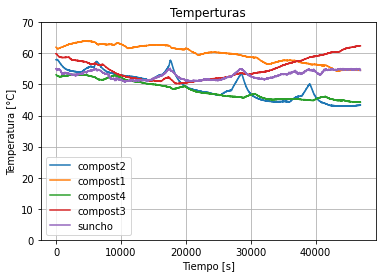

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/{DATE}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


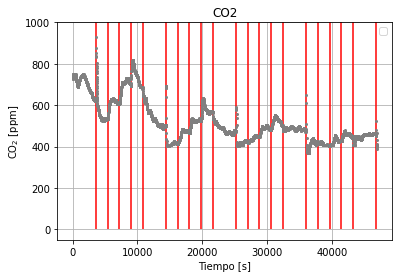

In [11]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,1000)

plt.savefig(f"{PATH}/{DATE}/figuras/CO2_completo.png")
plt.show()

# Integración

In [12]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

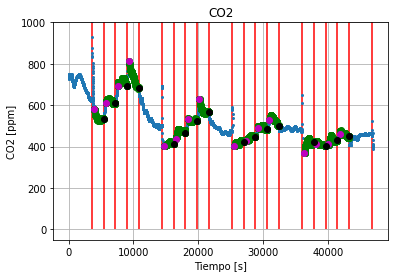

In [14]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(175000,200000)
plt.ylim(-50,1000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)
    
plt.savefig(f"{PATH}/{DATE}/figuras/areas_pintadas.png")
plt.show()

In [15]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [16]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [17]:
promedio

[538.6761133603239,
 620.336032388664,
 714.0728744939271,
 728.0161943319838,
 413.54655870445345,
 473.54655870445345,
 527.668016194332,
 576.7206477732793,
 419.80161943319837,
 443.4574898785425,
 491.2267206477733,
 528.2267206477733,
 418.7125506072874,
 412.04453441295544,
 430.38461538461536,
 458.4898785425101]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [ ]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(promedio))

In [ ]:
from datetime import datetime  
from datetime import timedelta  
  
#Add 1 day  
print(datetime.now() + timedelta(days=1))
  
#Subtract 60 seconds  
print (datetime.now() - timedelta(seconds=60)) 
  
#Add 2 years  
print (datetime.now() + timedelta(days=730) ) 
  
#Other Parameters you can pass in to timedelta:  
# days, seconds, microseconds,   
# milliseconds, minutes, hours, weeks  
  
#Pass multiple parameters (1 day and 5 minutes)  
print (datetime.now() + timedelta(days=1,minutes=5)  )

In [ ]:
DATE

In [ ]:
from datetime import date
date.fromisoformat(f'{DATE[0:10]}')

In [ ]:
datetime.time(f'{DATE[11:]}')

In [ ]:
DATE[11:].replace('"','\\' )

In [ ]:
replace(DATE[0:10],'"','\\"')